#  Unit 1



# Fixed strategy optimization

In [6]:
from fish import fish
import numpy as np
from skopt import gp_minimize, gbrt_minimize
from skopt.plots import plot_objective, plot_convergence, plot_gaussian_process
from utils import simulate
from utils import plot_sim


In [7]:
env = fish()

In [8]:
# A simple agent
class some_agent:
    def __init__(self, effort):
        self.effort = effort

    def predict(self, obs, **kwargs):
        return self.effort



In [9]:


def g(x):
    agent = some_agent(x)
    def my_function(i):
        np.random.seed(i)
        df, mu = simulate(agent, env, timeseries=False)
        return mu
    # do 100 simulations at each value to reduce noise    
    results = [my_function(i) for i in range(100)]
    return -np.mean(results)



In [10]:
%%time
# look for actions between [0,1] 
res = gp_minimize(g, [(0, 1.0)], n_calls = 20, verbose=True, n_jobs=-1)
res.fun, res.x

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 6.5427
Function value obtained: -108.8085
Current minimum: -108.8085
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 6.5626
Function value obtained: -96.5921
Current minimum: -108.8085
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 6.5685
Function value obtained: -96.6050
Current minimum: -108.8085
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 6.5860
Function value obtained: -96.6179
Current minimum: -108.8085
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 6.5399
Function value obtained: -96.6309
Current minimum: -108.8085
Iteration

(-124.30878417855152, [0.356916051909718])

132.32257840744418


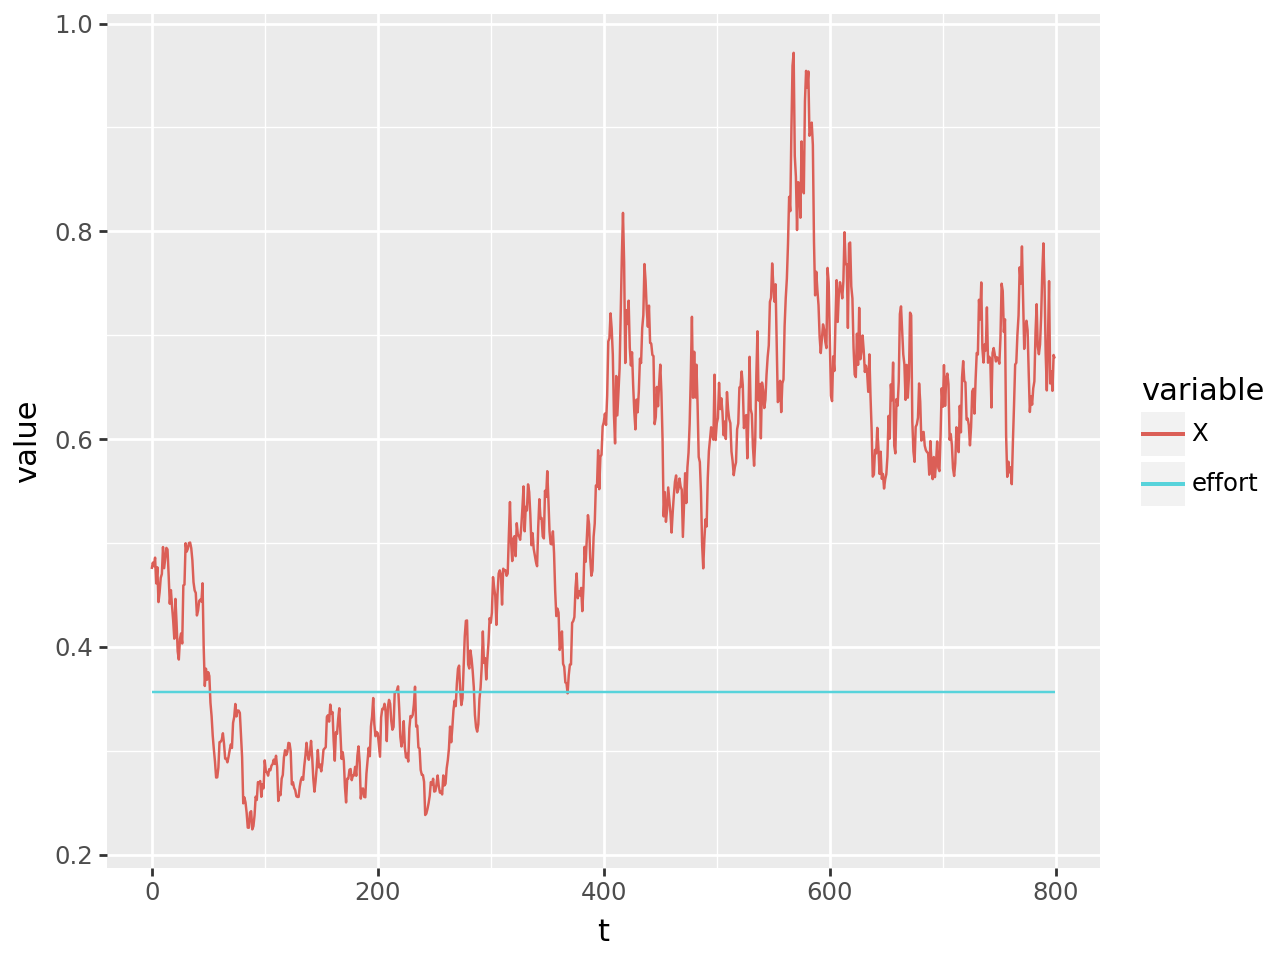

In [16]:

agent = some_agent(*res.x)
df, mu = simulate(agent, env)
print(mu)
plot_sim(df)

In [ ]:
import matplotlib.pyplot as plt

ax = plot_objective(res)

plt.show()

In [ ]:

ax2 = plot_convergence(res)

plt.show()

In [ ]:

ax2 = plot_gaussian_process(res)

plt.show()

In [17]:
import numpy as np
# A simple agent
class reed:
    def __init__(self, a):
        self.escapement = a
        self.q0 = 0.9

    def predict(self, obs, **kwargs):
        if obs < self.escapement:
            return 0
        # escapement = obs - obs*effort*q0
        effort = (obs - self.escapement ) / (obs * self.q0 )
        return effort


def g(x):
    agent = reed(x)
    def my_function(i):
        np.random.seed(i)
        df, mu = simulate(agent, env, timeseries=False)
        return mu
        
    results = [my_function(i) for i in range(100)]
    return -np.mean(results)


In [ ]:
%%time
# look for actions between [-1,1] for each species.
res = gp_minimize(g, [(0, 1.0)], n_calls = 25, verbose=True, n_jobs=-1)
res.fun, res.x

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 7.5408
Function value obtained: -28.1745
Current minimum: -28.1745
Iteration No: 2 started. Evaluating function at random point.


In [ ]:

agent = reed(*res.x)
df, mu = simulate(agent, env)
print(mu)
plot_sim(df)


In [ ]:

ax2 = plot_gaussian_process(res)

plt.show()